# Generate Region of Interests (ROI) labeled arrays for simple shapes
This example notebook explain the use of analysis module "skbeam/core/roi" https://github.com/scikit-beam/scikit-beam/blob/master/skbeam/core/roi.py 

In [1]:
import skbeam.core.roi as roi
import skbeam.core.correlation as corr

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

import xray_vision.mpl_plotting as mpl_plot

### Easily switch between interactive and static matplotlib plots

In [2]:
interactive_mode = False

import matplotlib as mpl
if interactive_mode:
    %matplotlib notebook
else:
    %matplotlib inline

backend = mpl.get_backend()
cmap='viridis'

## Draw annual (ring-shaped) regions of interest

In [3]:
center = (100., 100.)   # center of the rings

# Image shape which is used to determine the maximum extent of output pixel coordinates
img_shape = (200, 205)   

first_q = 10.0 # inner radius of the inner-most ring
delta_q = 5.0  #ring thickness

num_rings = 7  # number of Q rings

# step or spacing, spacing between rings 
one_step_q = 5.0  #  one spacing between rings

step_q = [2.5, 3.0, 5.8]   # differnt spacing between rings

### Test when there is same spacing between rings

In [4]:
# inner and outer radius for each ring
edges = roi.ring_edges(first_q, width=delta_q, spacing=one_step_q,
                           num_rings=num_rings)
edges

array([[ 10.,  15.],
       [ 20.,  25.],
       [ 30.,  35.],
       [ 40.,  45.],
       [ 50.,  55.],
       [ 60.,  65.],
       [ 70.,  75.]])

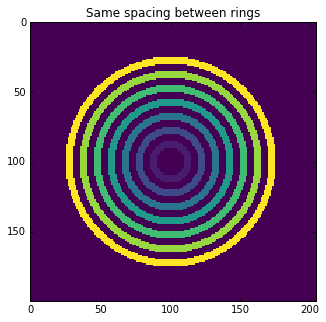

In [5]:
#Elements not inside any ROI are zero; elements inside each
#ROI are 1, 2, 3, corresponding to the order they are specified in edges.
label_array = roi.rings(edges, center, img_shape)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Same spacing between rings")
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()

### Test when there is different spacing between rings

In [6]:
# inner and outer radius for each ring

edges = roi.ring_edges(first_q, width=delta_q, spacing=step_q,
                           num_rings=4)
print("edges when there is different spacing between rings", edges)

edges when there is different spacing between rings [[ 10.   15. ]
 [ 17.5  22.5]
 [ 25.5  30.5]
 [ 36.3  41.3]]


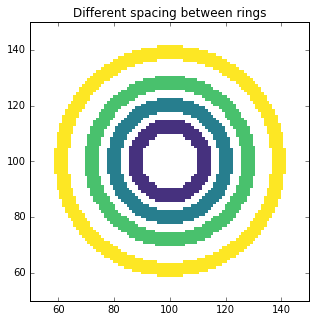

In [7]:
#Elements not inside any ROI are zero; elements inside each
#ROI are 1, 2, 3, corresponding to the order they are specified in edges.
label_array = roi.rings(edges, center, img_shape)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Different spacing between rings")
axes.set_xlim(50, 150)
axes.set_ylim(50, 150)
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()


### Test when there is no spacing between rings

In [8]:
# inner and outer radius for each ring
edges = roi.ring_edges(first_q, width=delta_q, num_rings=num_rings)
edges

array([[ 10.,  15.],
       [ 15.,  20.],
       [ 20.,  25.],
       [ 25.,  30.],
       [ 30.,  35.],
       [ 35.,  40.],
       [ 40.,  45.]])

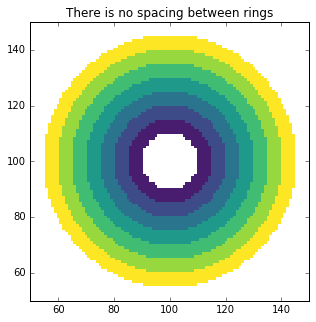

In [9]:
#Elements not inside any ROI are zero; elements inside each
#ROI are 1, 2, 3, corresponding to the order they are specified in edges.
label_array = roi.rings(edges, center, img_shape)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("There is no spacing between rings")
axes.set_xlim(50, 150)
axes.set_ylim(50, 150)
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()

### Generate a ROI of Segmented Rings¶

In [61]:
center = (75, 75)   # center of the rings

#Image shape which is used to determine the maximum extent of output pixel coordinates
img_shape = (150, 140) 

first_q = 5.0  # inner radius of the inner-most ring
delta_q = 5.0  #ring thickness
num_rings = 4  # number of rings

slicing = 4 # number of pie slices or list of angles in radians
spacing = 4 # margin between rings, 0 by default



#### find the inner and outer radius of each ring


In [62]:
# inner and outer radius for each ring
edges = roi.ring_edges(first_q, width=delta_q, spacing=spacing,
                           num_rings=num_rings)

edges

array([[  5.,  10.],
       [ 14.,  19.],
       [ 23.,  28.],
       [ 32.,  37.]])

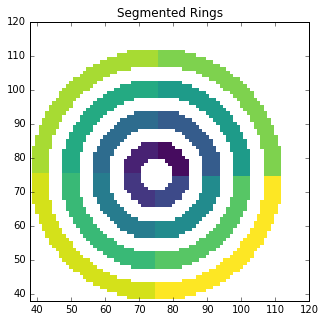

In [63]:
#Elements not inside any ROI are zero; elements inside each
#ROI are 1, 2, 3, corresponding to the order they are specified in edges.
label_array = roi.segmented_rings(edges, slicing, center,
                                      img_shape, offset_angle=0)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Segmented Rings")
axes.set_xlim(38, 120)
axes.set_ylim(38, 120)
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()


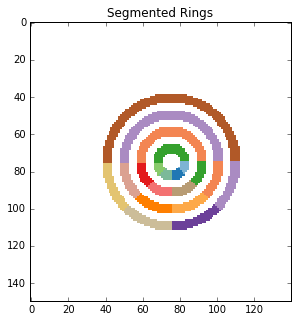

In [64]:
slicing = np.radians([0, 45, 90, 135, 180])
label_array = roi.segmented_rings(edges, slicing, center,
                                      img_shape, offset_angle=0)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Segmented Rings")
#axes.set_xlim(38, 120)
#axes.set_ylim(38, 120)
im = mpl_plot.show_label_array(axes, label_array)
plt.show()


In [65]:
np.radians(slicing)

array([ 0.        ,  0.01370778,  0.02741557,  0.04112335,  0.05483114])

In [60]:
np.unique(label_array)[1:]

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 13, 14, 15, 17])

In [ ]:
def segmented_rings(edges, segments, center, shape, offset_angle=0):
    """
    Parameters
    ----------
    edges : array
         inner and outer radius for each ring

    segments : int or list
        number of pie slices or list of angles in radians
        That is, 8 produces eight equal-sized angular segments,
        whereas a list can be used to produce segments of unequal size.

    center : tuple
        point in image where r=0; may be a float giving subpixel precision.
        Order is (rr, cc).

    shape: tuple
        Image shape which is used to determine the maximum extent of output
        pixel coordinates. Order is (rr, cc).

    angle_offset : float or array, optional
        offset in radians from offset_angle=0 along the positive X axis

    Returns
    -------
    label_array : array
        Elements not inside any ROI are zero; elements inside each
        ROI are 1, 2, 3, corresponding to the order they are specified
        in edges and segments

    """
    edges = np.asarray(edges).ravel()
    if not 0 == len(edges) % 2:
        raise ValueError("edges should have an even number of elements, "
                         "giving inner, outer radii for each ring")
    if not np.all(np.diff(edges) >= 0):
        raise ValueError("edges are expected to be monotonically increasing, "
                         "giving inner and outer radii of each ring from "
                         "r=0 outward")

    agrid = utils.angle_grid(center, shape)

    agrid[agrid < 0] = 2*np.pi + agrid[agrid < 0]

    segments_is_list = isinstance(segments, collections.Iterable)
    if segments_is_list:
        segments = np.asarray(segments) + offset_angle
    else:
        # N equal segments requires N+1 bin edges spanning 0 to 2pi.
        segments = np.linspace(0, 2*np.pi, num=1+segments, endpoint=True)
        segments += offset_angle

    # the indices of the bins(angles) to which each value in input
    #  array(angle_grid) belongs.
    ind_grid = (np.digitize(np.ravel(agrid), segments,
                            right=False)).reshape(shape)

    label_array = np.zeros(shape, dtype=np.int64)
    # radius grid for the image_shape
    rgrid = utils.radial_grid(center, shape)

    # assign indices value according to angles then rings
    len_segments = len(segments)
    for i in range(len(edges) // 2):
        indices = (edges[2*i] <= rgrid) & (rgrid < edges[2*i + 1])
        # Combine "segment #" and "ring #" to get unique label for each.
        label_array[indices] = ind_grid[indices] + (len_segments - 1) * i

    return label_array

In [55]:
import skbeam.core.utils as utils
center = (5, 5)
shape = (10, 10)
agrid = utils.angle_grid(center, shape)

In [56]:
agrid

array([[-2.35619449, -2.24553727, -2.11121583, -1.9513027 , -1.76819189,
        -1.57079633, -1.37340077, -1.19028995, -1.03037683, -0.89605538],
       [-2.46685171, -2.35619449, -2.21429744, -2.03444394, -1.81577499,
        -1.57079633, -1.32581766, -1.10714872, -0.92729522, -0.78539816],
       [-2.60117315, -2.49809154, -2.35619449, -2.15879893, -1.89254688,
        -1.57079633, -1.24904577, -0.98279372, -0.78539816, -0.64350111],
       [-2.76108628, -2.67794504, -2.55359005, -2.35619449, -2.03444394,
        -1.57079633, -1.10714872, -0.78539816, -0.5880026 , -0.46364761],
       [-2.94419709, -2.89661399, -2.8198421 , -2.67794504, -2.35619449,
        -1.57079633, -0.78539816, -0.46364761, -0.32175055, -0.24497866],
       [ 3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 2.94419709,  2.89661399,  2.8198421 ,  2.67794504,  2.35619449,
         1.57079633,  0.78539816,  0.46364761

### Generate a  ROI of Pies

In [13]:
first_q = 0  

# inner and outer radius for each ring
edges = roi.ring_edges(first_q, width=50, num_rings=1)

edges

array([[  0.,  50.]])

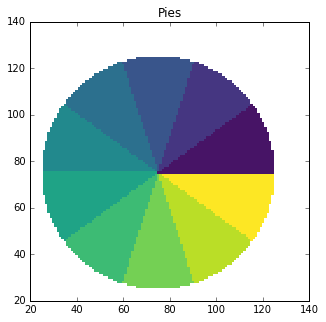

In [14]:
slicing = 10 # number of pie slices or list of angles in radians

#Elements not inside any ROI are zero; elements inside each
#ROI are 1, 2, 3, corresponding to the order they are specified in edges.
label_array = roi.segmented_rings(edges, slicing, center,
                                      img_shape, offset_angle=0)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Pies")
axes.set_xlim(20, 140)
axes.set_ylim(20, 140)
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()

## Ellipse ROI

In [15]:
e_label_array =roi.ellipse((300, 300), (12, 15), [6, 9],
                       [8, 12])

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Pies")
axes.set_xlim(0, 40)
axes.set_ylim(0, 30)
im = mpl_plot.show_label_array(axes, e_label_array, cmap)
plt.show()

AttributeError: 'module' object has no attribute 'ellipse'

In [87]:
from skimage.draw import ellipse_perimeter

def ellipse(shape, center, y_radius, x_radius):
    """Generate ellipse perimeter co-ordinates to draw ellipse shaped rois'
    Parameters
    ----------
    shape : tuple
        Shape of the image in which to create the ROIs
        e.g., shape=(512, 512)
    center : tuple
        Centre coordinate of ellipse
    y_radius : list
       List of Minor axes for ellipse
    x_radius : list
        List of Major axes for ellipse

    Returns
    -------
    label_array : array
        Elements not inside any ROI are zero; elements inside each
        ROI are 1, 2, 3, corresponding to the order they are specified
        in edges.

    """
    label_array = np.zeros(shape, dtype=np.int64)

    if len(y_radius) != len(x_radius):
        raise ValueError("Number of minor and major semi-axes"
                         "have to be same")
    l = 0
    for y, x in zip(y_radius, x_radius):
        rr, cc = ellipse_perimeter(center[0], center[1], y, x)
        cc = cc[-1 < rr]
        cc = cc[-1 < cc] # < shape[0]-1]
        rr = rr[-1 < rr] # < shape[1]-1]
        rr = rr[-1 < cc] # < shape[0]-1]
        l += 1
        print (rr)
        print (cc)
        label_array[rr, cc] = l

    return label_array


[ 45  45  45  45  46  46  44  44  47  47  43  43  48  48  42  42  49  49
  41  41  50  50  40  40  51  51  39  39  52  52  38  38  53  53  37  37
  54  54  36  36  55  55  35  35  56  56  34  34  57  57  33  33  58  58
  32  32  59  59  31  31  60  60  30  30  61  61  29  29  62  62  28  28
  63  63  27  27  64  64  26  26  65  65  25  25  66  66  24  24  67  67
  23  23  68  68  22  22  69  69  21  21  70  70  20  20  71  71  19  19
  72  72  18  18  73  73  17  17  74  74  16  16  75  75  15  15  76  76
  14  14  77  77  13  13  78  78  12  12  79  79  11  11  80  80  10  10
  81  81   9   9  82  82   8   8  83  83   7   7  84  84   6   6  85  85
   5   5  86  86   4   4  87  87   3   3  88  88   2   2  89  89   1   1
  90  90   0   0  91  91  92  92  93  93  94  94  95  95  96  96  97  97
  98  98  99  99 100 100 101 101 102 102 103 103 104 104 104 104 105 105
 105 105 105 105]
[60 20 20 60 60 20 20 60 60 20 20 60 60 20 20 60 60 20 20 60 60 20 20 60 60
 20 20 60 60 20 20 60 60 20 20

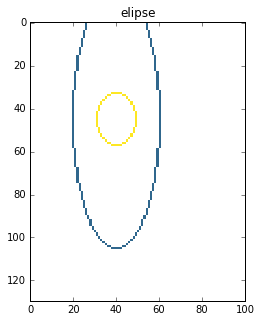

In [89]:
e_label_array = ellipse((130, 120), (45, 40), [60, 12],
                            [20, 9])

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("elipse")
axes.set_xlim(0, 100)
#axes.set_ylim(0, 80)
im = mpl_plot.show_label_array(axes, e_label_array, cmap)
plt.show()

## Rectangle region of interests.

In [18]:
# Image shape which is used to determine the maximum extent of output pixel coordinates
shape = (15, 26)

# coordinates of the upper-left corner and width and height of each rectangle
roi_data = np.array(([2, 2, 6, 3], [6, 7, 8, 5], [8, 18, 5, 10]),
                        dtype=np.int64)

#Elements not inside any ROI are zero; elements inside each ROI are 1, 2, 3, corresponding
# to the order they are specified in coords.
label_array = roi.rectangles(roi_data, shape)
roi_inds, pixel_list = roi.extract_label_indices(label_array)

## Generate Bar ROI's

In [19]:
edges = [[3, 4], [5, 7], [12, 15]]
edges

[[3, 4], [5, 7], [12, 15]]

## Create Horizontal bars and Vertical bars

In [20]:
h_label_array = roi.bar(edges, (20, 25))   # Horizontal Bars

In [21]:
v_label_array = roi.bar(edges, (20, 25), horizontal=False)   # Vertical Bars

## Create Box ROI's

In [22]:
b_label_array = roi.box((20, 20), edges)

## Plot bar rois, box rois and rectangle rois

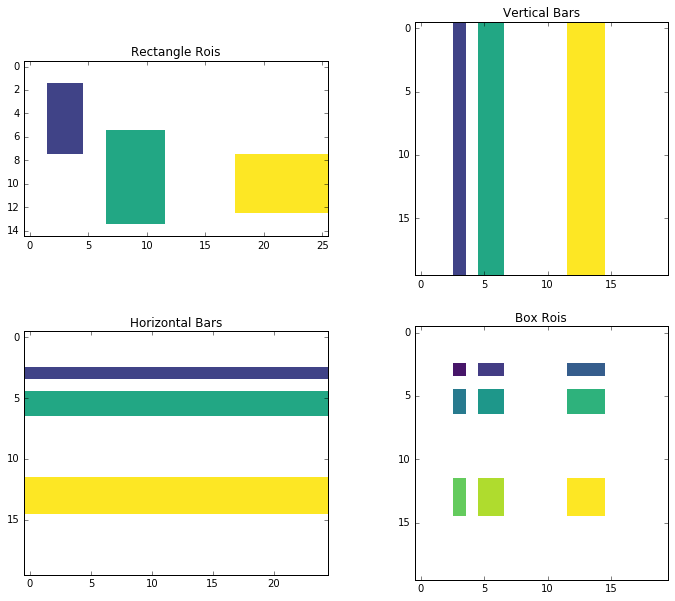

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[1, 0].set_title("Horizontal Bars")
im = mpl_plot.show_label_array(axes[1, 0], h_label_array, cmap)
axes[0, 1].set_title("Vertical Bars")
im = mpl_plot.show_label_array(axes[0, 1], v_label_array, cmap)
axes[1, 1].set_title("Box Rois")
im = mpl_plot.show_label_array(axes[1, 1], b_label_array, cmap)
axes[0, 0].set_title("Rectangle Rois")
im = mpl_plot.show_label_array(axes[0, 0], label_array, cmap)
plt.show()

# Create line ROI's

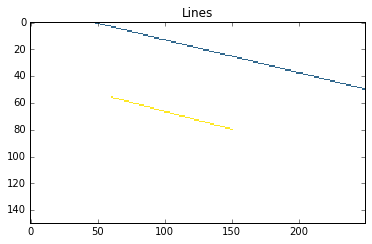

In [24]:
label_lines= roi.lines(([0, 45, 50, 256], [56, 60, 80, 150]), (150, 250))
# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Lines")
im = mpl_plot.show_label_array(axes, label_lines, cmap)
plt.show()

In [21]:
import skbeam
print(skbeam.__version__)

0.0.7+107.g8f7ff4d


In [96]:
values1 = np.repeat(range(10), 5)

In [97]:
values1

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9,
       9, 9, 9, 9])

In [99]:
shape = (10,5)
values = values1.T.ravel()

In [100]:
values

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9,
       9, 9, 9, 9])

In [102]:
values = np.repeat(range(5), 10).T

In [103]:
values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4])

In [130]:
def _make_roi(coords, edges, shape):
    """ Helper function to create ring rois and bar rois

    Parameters
    ----------
    coords : array
        shape is image shape
    edges : list
        List of tuples of inner (left or top) and outer (right or bottom)
        edges of each roi.
        e.g., edges=[(1, 2), (11, 12), (21, 22)]
    shape : tuple
        Shape of the image in which to create the ROIs
        e.g., shape=(512, 512)

    Returns
    -------
    label_array : array
        Elements not inside any ROI are zero; elements inside each
        ROI are 1, 2, 3, corresponding to the order they are
        specified in `edges`.
        Has shape=`image shape`
    """
    label_array = np.digitize(coords, edges, right=False)
    # Even elements of label_array are in the space between rings.
    label_array = (np.where(label_array % 2 != 0, label_array, 0) + 1) // 2
    return label_array.reshape(shape)


In [159]:
def bar(edges, shape, horizontal=True, values=None):
    """Draw bars defined by `edges` from one edge to the other of `image_shape`

    Bars will be horizontal or vertical depending on the value of `horizontal`

    Parameters
    ----------
    edges : list
        List of tuples of inner (left or top) and outer (right or bottom)
        edges of each bar.
        e.g., edges=[(1, 2), (11, 12), (21, 22)]
    shape : tuple
        Shape of the image in which to create the ROIs
        e.g., shape=(512, 512)
    horizontal : bool, optional
        True: Make horizontal bars
        False: Make vertical bars
        Defaults to True
    values : array, optional
        image pixels co-ordinates

    Returns
    -------
    label_array : array
        Elements not inside any ROI are zero; elements inside each
        ROI are 1, 2, 3, corresponding to the order they are
        specified in `edges`.
        Has shape=`image shape`

    Note
    ----
    The primary use case is in GISAXS.
    """
    edges = np.atleast_2d(np.asarray(edges)).ravel()
    if not 0 == len(edges) % 2:
        raise ValueError("edges should have an even number of elements, "
                         "giving inner, outer edge value for each bar")
    if not np.all(np.diff(edges) >= 0):
        raise ValueError("edges are expected to be monotonically increasing, "
                         "giving inner and outer radii of each bar from "
                         "r=0 outward")
    if values is None:
        values = np.repeat(range(shape[0]), shape[1])
    if not horizontal:
        #values = values.reshape(shape).T.ravel()
        values = np.tile(range(shape[1]), shape[0])
        print (values)
    return _make_roi(values, edges, shape)


In [160]:
shape = (20, 20)
edges = [[3, 4], [5, 7], [12, 15]]
edges

[[3, 4], [5, 7], [12, 15]]

In [161]:
v_label_array = bar(edges, (25, 20), horizontal=False)   # Vertical Bars

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4
  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9
 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14
 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4
  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9
 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14
 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4
  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9
 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14
 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4
  5  6  7  8

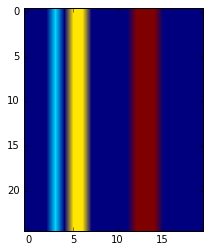

In [162]:
plt.imshow(v_label_array)

In [133]:
np.arange(5)

array([0, 1, 2, 3, 4])